Statistische Übersicht (nach dem Entfernen der Ausreisser):
              Rooms          Area         Price
count  11567.000000  11567.000000  11567.000000
mean       3.381257     82.356272   1775.999222
std        1.077679     30.167821    533.774273
min        1.000000      1.000000    335.000000
25%        2.500000     64.000000   1410.000000
50%        3.500000     80.000000   1720.000000
75%        4.500000    100.000000   2088.000000
max       10.000000    330.000000   3306.000000


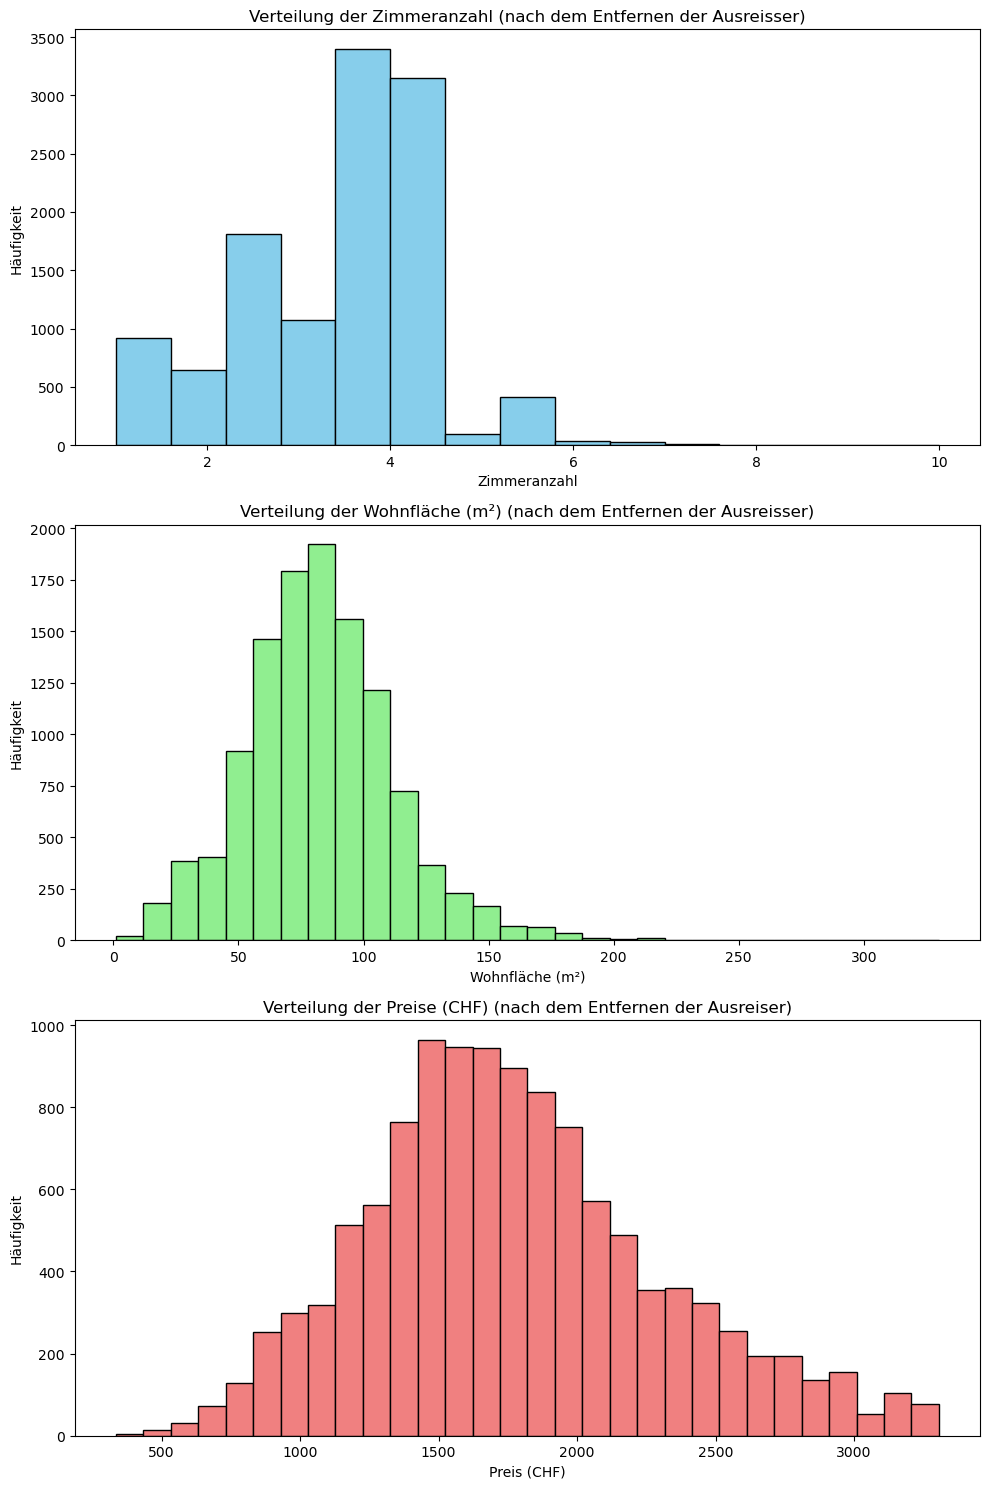

Korrelationen (nach dem Entfernen der Ausreiser):
          Rooms      Area     Price
Rooms  1.000000  0.800573  0.541112
Area   0.800573  1.000000  0.652752
Price  0.541112  0.652752  1.000000


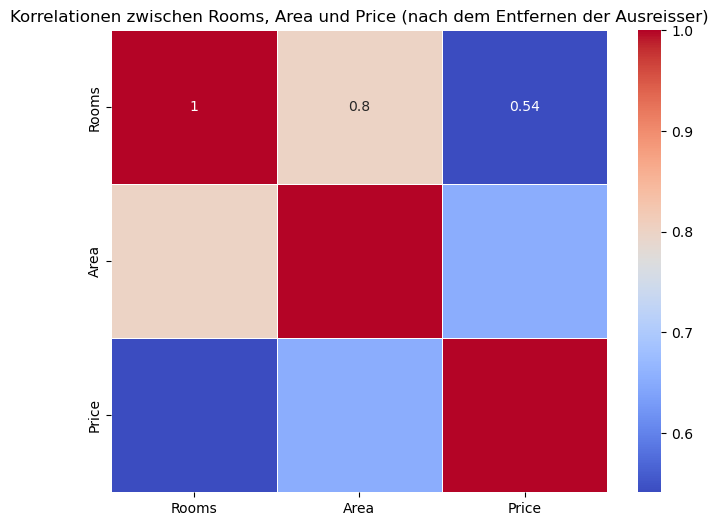

Regionale Analyse (nach dem Entfernen der Ausreisser):
              Region   Mean Price  Median Price  Min Price  Max Price  \
0             Aargau  1863.030573        1830.0        650       3300   
1   Basel-Landschaft  1934.968786        1860.0        790       3300   
2        Basel-Stadt  1800.016260        1710.0        420       3300   
3               Bern  1850.630573        1800.0        600       3304   
4           Freiburg  1711.677496        1690.0        500       3290   
5               Genf  2188.673575        2191.0        905       3300   
6             Glarus  1632.382353        1473.5        750       3100   
7               Jura  1334.695652        1275.0        335       2600   
8             Luzern  1931.235669        1900.0        425       3285   
9          Neuenburg  1444.183398        1344.5        455       3300   
10         Nidwalden  2244.040000        2380.0        870       3130   
11          Obwalden  1900.333333        1900.0        930       3250

C:\Users\waldm\AppData\Local\Temp\ipykernel_13496\2094987072.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Price_per_sqm'] = data_cleaned['Price'] / data_cleaned['Area']


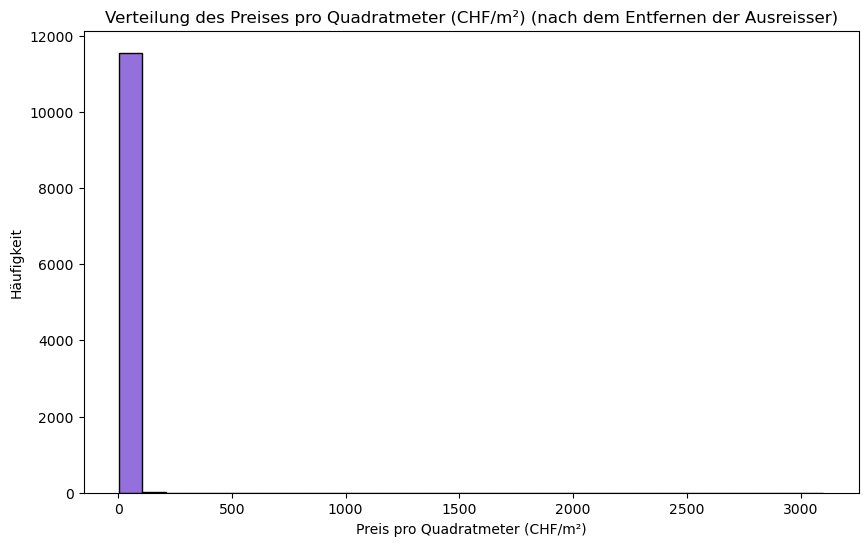

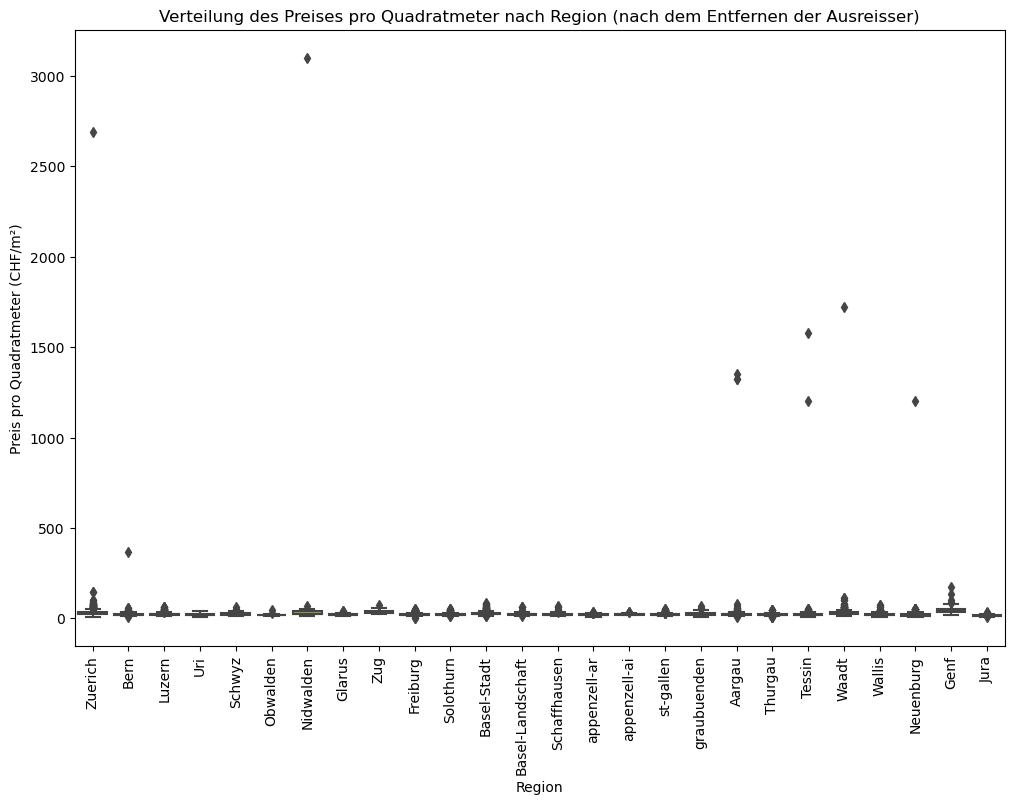

Preis pro Quadratmeter nach Stadt (nach dem Entfernen der Ausreisser):
            City  Mean Price per sqm  Median Price per sqm  Min Price per sqm  \
0          AIGLE           23.593750             23.593750          23.593750   
1         Aadorf           18.205080             17.452830          14.803922   
2      Aadorf TG           29.553712             23.013699          21.416667   
3          Aarau           24.756931             22.593750          16.000000   
4     Aarau Rohr           23.110856             20.329670          19.266055   
...          ...                 ...                   ...                ...   
1530         Zug           42.844009             41.584615          24.285714   
1531     Zumikon           29.112500             29.112500          29.112500   
1532     Zunzgen           21.642247             22.176471          19.805825   
1533      Zurich           49.400000             49.400000          49.400000   
1534     Zwingen           18.569968  

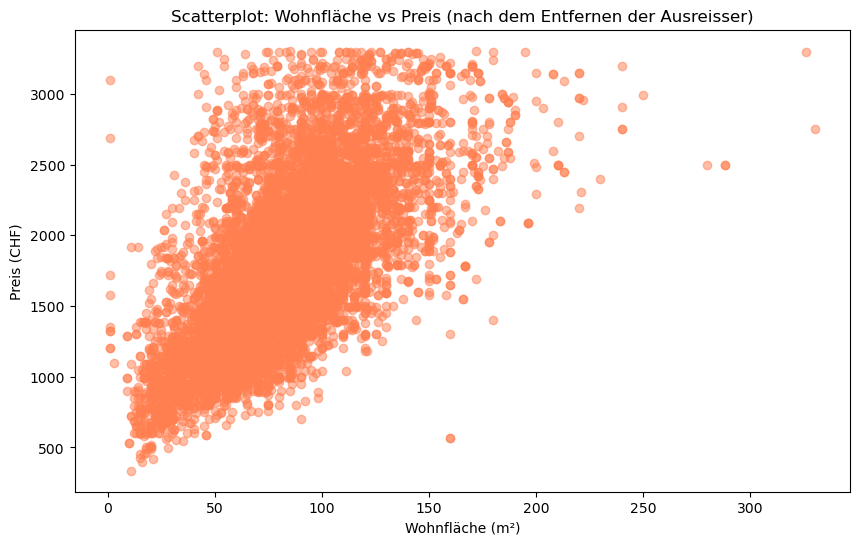

E:\Tools\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Tools\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Tools\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Tools\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

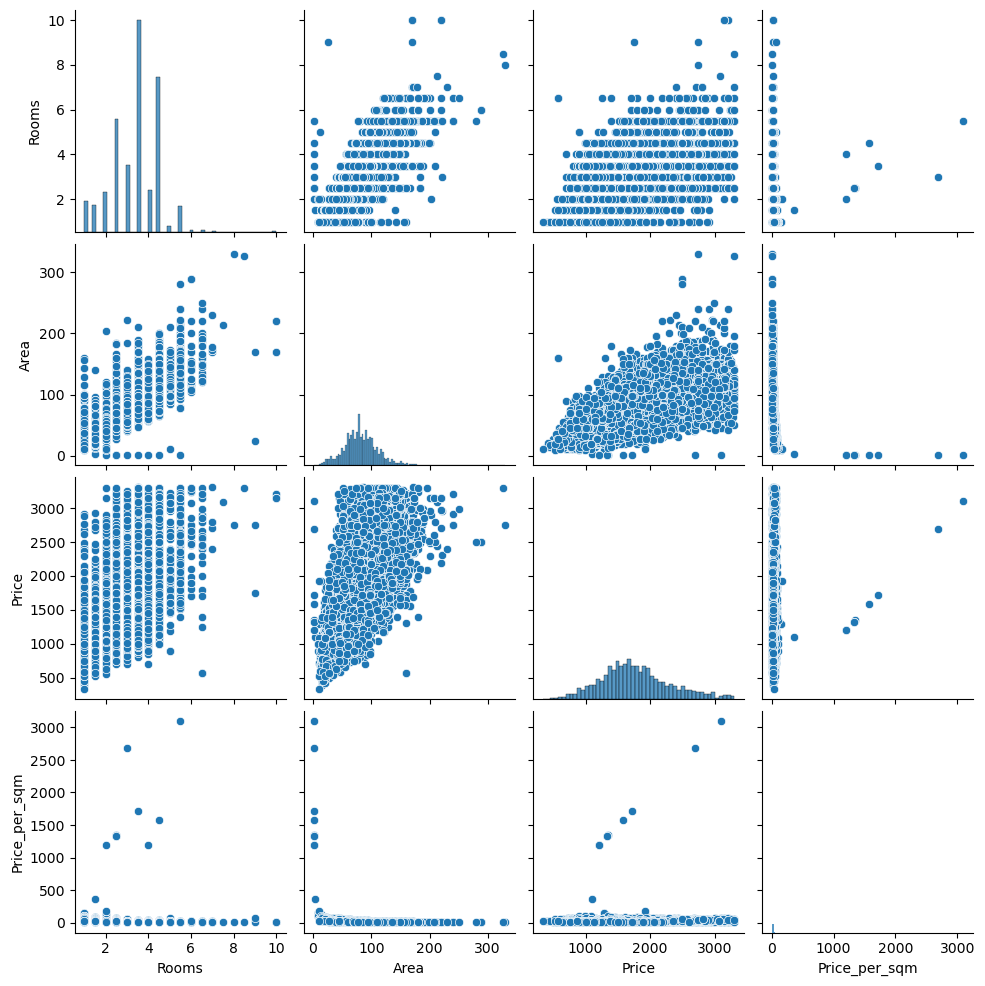

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'data_immo_202405151452.csv'
data = pd.read_csv(file_path)


def find_outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

price_outliers = find_outliers_IQR(data, 'Price')
data_cleaned = data[~data.index.isin(price_outliers.index)]

# Statistische Übersicht nach dem Entfernen der Ausreiser
stats_cleaned = data_cleaned[['Rooms', 'Area', 'Price']].describe()
print("Statistische Übersicht (nach dem Entfernen der Ausreisser):")
print(stats_cleaned)

# Histogramme erstellen
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Histogramm für die Anzahl der Zimmer
axs[0].hist(data_cleaned['Rooms'], bins=15, color='skyblue', edgecolor='black')
axs[0].set_title('Verteilung der Zimmeranzahl (nach dem Entfernen der Ausreisser)')
axs[0].set_xlabel('Zimmeranzahl')
axs[0].set_ylabel('Häufigkeit')

# Histogramm für die Wohnfläche
axs[1].hist(data_cleaned['Area'], bins=30, color='lightgreen', edgecolor='black')
axs[1].set_title('Verteilung der Wohnfläche (m²) (nach dem Entfernen der Ausreisser)')
axs[1].set_xlabel('Wohnfläche (m²)')
axs[1].set_ylabel('Häufigkeit')

# Histogramm für den Preis
axs[2].hist(data_cleaned['Price'], bins=30, color='lightcoral', edgecolor='black')
axs[2].set_title('Verteilung der Preise (CHF) (nach dem Entfernen der Ausreiser)')
axs[2].set_xlabel('Preis (CHF)')
axs[2].set_ylabel('Häufigkeit')

plt.tight_layout()
plt.show()

# Korrelationen berechnen
correlation_matrix_cleaned = data_cleaned[['Rooms', 'Area', 'Price']].corr()
print("Korrelationen (nach dem Entfernen der Ausreiser):")
print(correlation_matrix_cleaned)

# Heatmap der Korrelationen
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korrelationen zwischen Rooms, Area und Price (nach dem Entfernen der Ausreisser)')
plt.show()

# Regionale Analyse
region_analysis_cleaned = data_cleaned.groupby('Region').agg({
    'Price': ['mean', 'median', 'min', 'max'],
    'Area': ['mean', 'median', 'min', 'max']
}).reset_index()

region_analysis_cleaned.columns = ['Region', 'Mean Price', 'Median Price', 'Min Price', 'Max Price', 'Mean Area', 'Median Area', 'Min Area', 'Max Area']
print("Regionale Analyse (nach dem Entfernen der Ausreisser):")
print(region_analysis_cleaned)

# Preis pro Quadratmeter berechnen
data_cleaned['Price_per_sqm'] = data_cleaned['Price'] / data_cleaned['Area']
price_per_sqm_stats_cleaned = data_cleaned['Price_per_sqm'].describe()
print("Statistische Übersicht für den Preis pro Quadratmeter (nach dem Entfernen der Ausreisser):")
print(price_per_sqm_stats_cleaned)

# Histogramm für den Preis pro Quadratmeter
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['Price_per_sqm'], bins=30, color='mediumpurple', edgecolor='black')
plt.title('Verteilung des Preises pro Quadratmeter (CHF/m²) (nach dem Entfernen der Ausreisser)')
plt.xlabel('Preis pro Quadratmeter (CHF/m²)')
plt.ylabel('Häufigkeit')
plt.show()

# Regionale Verteilung des Preises pro Quadratmeter
plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Price_per_sqm', data=data_cleaned)
plt.title('Verteilung des Preises pro Quadratmeter nach Region (nach dem Entfernen der Ausreisser)')
plt.xlabel('Region')
plt.ylabel('Preis pro Quadratmeter (CHF/m²)')
plt.xticks(rotation=90)
plt.show()

# Preis pro Quadratmeter nach Stadt
city_analysis_cleaned = data_cleaned.groupby('City').agg({
    'Price_per_sqm': ['mean', 'median', 'min', 'max']
}).reset_index()
city_analysis_cleaned.columns = ['City', 'Mean Price per sqm', 'Median Price per sqm', 'Min Price per sqm', 'Max Price per sqm']
print("Preis pro Quadratmeter nach Stadt (nach dem Entfernen der Ausreisser):")
print(city_analysis_cleaned)

# Scatterplot: Fläche vs Preis
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['Area'], data_cleaned['Price'], alpha=0.5, c='coral')
plt.title('Scatterplot: Wohnfläche vs Preis (nach dem Entfernen der Ausreisser)')
plt.xlabel('Wohnfläche (m²)')
plt.ylabel('Preis (CHF)')
plt.show()

# Pairplot zur Untersuchung der Beziehungen zwischen den Variablen
sns.pairplot(data_cleaned[['Rooms', 'Area', 'Price', 'Price_per_sqm']])
plt.show()
